In [1]:
import pandas as pd

data = {
    "CustomerID": [1, 2, 3, 4, 5],
    "Response": [
        "I love your service, very satisfied!",
        "The delivery was late and the product was damaged.",
        "Okay experience, not too bad but could be better.",
        "Excellent support team, fast response!",
        "Horrible quality, I want a refund!"
    ]
}

df = pd.DataFrame(data)
df.to_csv("survey_data.csv", index=False)
df.head()


,CustomerID,Response
0,1,"I love your service, very satisfied!"
1,2,The delivery was late and the product was dama...
2,3,"Okay experience, not too bad but could be better."
3,4,"Excellent support team, fast response!"
4,5,"Horrible quality, I want a refund!"


In [2]:
df = pd.read_csv("survey_data.csv")
df['clean_text'] = df['Response'].str.lower()
df.head()


,CustomerID,Response,clean_text
0,1,"I love your service, very satisfied!","i love your service, very satisfied!"
1,2,The delivery was late and the product was dama...,the delivery was late and the product was dama...
2,3,"Okay experience, not too bad but could be better.","okay experience, not too bad but could be better."
3,4,"Excellent support team, fast response!","excellent support team, fast response!"
4,5,"Horrible quality, I want a refund!","horrible quality, i want a refund!"


In [3]:
from textblob import TextBlob

def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['clean_text'].apply(get_sentiment)
df[['Response', 'sentiment']]


,Response,sentiment
0,"I love your service, very satisfied!",positive
1,The delivery was late and the product was dama...,negative
2,"Okay experience, not too bad but could be better.",positive
3,"Excellent support team, fast response!",positive
4,"Horrible quality, I want a refund!",negative


Matplotlib is building the font cache; this may take a moment.


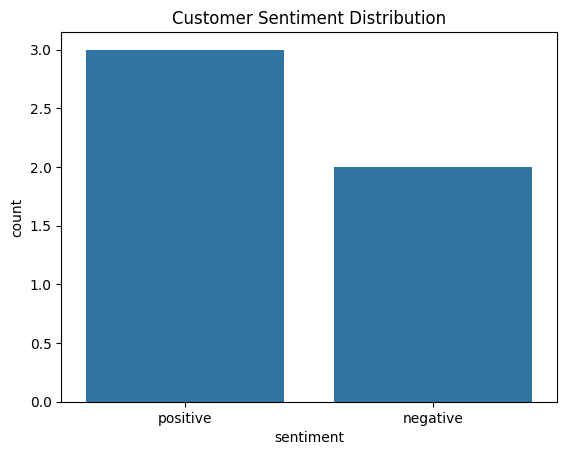

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment', data=df)
plt.title('Customer Sentiment Distribution')
plt.show()


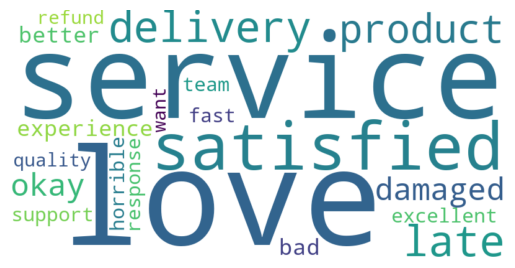

In [5]:
from wordcloud import WordCloud

text = ' '.join(df['clean_text'])
wc = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


In [6]:
df.to_csv("survey_sentiment_results.csv", index=False)



In [1]:
from transformers import pipeline

# Load the pre-trained transformer model for sentiment analysis
sentiment_model = pipeline("sentiment-analysis")

# Test it quickly
test = "I love this product, but delivery was slow."
sentiment_model(test)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use mps:0


[{'label': 'NEGATIVE', 'score': 0.9906176924705505}]

In [7]:

df = pd.read_csv("survey_data.csv")


# Apply Hugging Face model to each response
df['transformer_sentiment'] = df['Response'].apply(lambda x: sentiment_model(x)[0]['label'])
df[['Response', 'transformer_sentiment']]



,Response,transformer_sentiment
0,"I love your service, very satisfied!",POSITIVE
1,The delivery was late and the product was dama...,NEGATIVE
2,"Okay experience, not too bad but could be better.",POSITIVE
3,"Excellent support team, fast response!",POSITIVE
4,"Horrible quality, I want a refund!",NEGATIVE


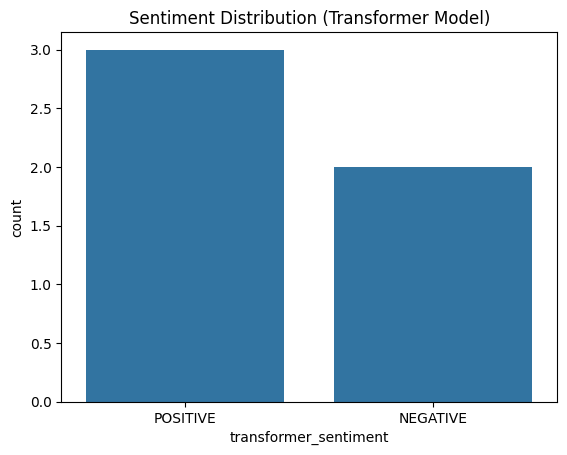

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='transformer_sentiment', data=df)
plt.title('Sentiment Distribution (Transformer Model)')
plt.show()


In [9]:
df.to_csv("survey_sentiment_transformer.csv", index=False)

In [10]:
# Using a multilingual or fine-tuned model
sentiment_model = pipeline("sentiment-analysis", model="finiteautomata/bertweet-base-sentiment-analysis")


config.json:   0%|          | 0.00/949 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

bpe.codes: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/540M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Device set to use mps:0


In [ ]:
#sentiment_model = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")


In [11]:
df.groupby('transformer_sentiment')['Response'].apply(list)


transformer_sentiment
NEGATIVE    [The delivery was late and the product was dam...
POSITIVE    [I love your service, very satisfied!, Okay ex...
Name: Response, dtype: object